<h4>Table of Contents</h4>

- [Introduction](#introduction)                  
- [Data Preparation](#data-preparation)  
- [Exploratory Data Analysis](#exploratory-data-analysis)  
  - [Churn by Location](#churn-by-location)
  - [Churn by GB Use and Tenure](#churn-by-gb-use-and-tenure)  
  - [Churn by Offer Type](#churn-by-offer-type)  
  - [Churn by Internet Type](#churn-by-internet-type)  
  - [Churn by Customer Data](#churn-by-customer-data)  
  - [Churn by Payment Information](#churn-by-payment-information)  
- [Model Training](#model-training)  
- [Conclusion](#conclusion)

# Introduction

<p style="font-size: 18px">I am investigating reasons that customers may churn, or leave, from the TELCO corp. Also, I am building a machine learning model that can predict if the customer will churn. </p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Status_Analysis.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Online_Services.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/a_IBM Telco Customers Churn Datasets.xlsx
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Customer_Info.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/TELCO ER Diagram.png
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Service_Options.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Location_Data.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Payment_Info.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hassanelfattmi/why-do-customers-leave-can-you-spot-the-churners")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/why-do-customers-leave-can-you-spot-the-churners


In [3]:
customer_info_df = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Customer_Info.csv')
location_data_df = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Location_Data.csv')
online_services_df = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Online_Services.csv')
payment_info_df = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Payment_Info.csv')
service_options_df = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Service_Options.csv')
status_analysis_df = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Status_Analysis.csv')



In [4]:
customer_info_df = customer_info_df.drop(columns='customer_id')
location_data_df = location_data_df.drop(columns='customer_id')
online_services_df = online_services_df.drop(columns='customer_id')
payment_info_df = payment_info_df.drop(columns='customer_id')
service_options_df = service_options_df.drop(columns='customer_id')
status_analysis_df = status_analysis_df.drop(columns='customer_id')


In [5]:
customer_info_df.head()


,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,Female,37,No,No,Yes,No,0,Yes
1,Male,46,No,No,No,No,0,No
2,Male,50,No,No,No,No,0,No
3,Male,78,No,Yes,Yes,No,0,Yes
4,Female,75,No,Yes,Yes,No,0,Yes


In [6]:
location_data_df.head()


,country,state,city,zip_code,total_population,latitude,longitude
0,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,United States,California,Camarillo,93010,42853,34.227846,-119.079903


In [7]:
online_services_df.head()
#online_services_df['internet_type'].value_counts()


,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic


In [8]:
payment_info_df.head()
#payment_info_df['contract'].value_counts()



,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


In [9]:

service_options_df.head()

#service_options_df['multiple_lines'] = (service_options_df['multiple_lines'].map({'Yes' : 1, 'No': 0})).astype(int)


,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
0,9,Yes,Yes,No,16,Yes,NaN,Yes,2
1,9,Yes,Yes,Yes,10,No,NaN,No,0
2,4,Yes,Yes,No,30,Yes,Offer E,No,0
3,13,Yes,Yes,No,4,Yes,Offer D,Yes,1
4,3,Yes,Yes,No,11,Yes,NaN,Yes,3


# Data Preparation

In [10]:
#Converting unlimited data column from object to binary
service_options_df['unlimited_data'] = (
    service_options_df['unlimited_data']
    .map({'Yes': 1, 'No': 0})
    .astype(int)  # Convert to integer
)

In [11]:
#Converting the churn category data from object to binary columns
binary_churn_cat = pd.get_dummies(status_analysis_df['churn_category'], prefix="", prefix_sep="")
binary_churn_cat = binary_churn_cat.astype(int)
binary_churn_cat = binary_churn_cat.drop(columns='Not Applicable')
binary_churn_cat = binary_churn_cat.drop(columns='Other')
binary_churn_cat.head()

,Attitude,Competitor,Dissatisfaction,Price
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [12]:
#Creatig a new colun for NaN offers, and converting them to binary under No Offer
service_options_df['offer'] = service_options_df['offer'].fillna('No Offer')
binary_offer_type = pd.get_dummies(service_options_df['offer'])
binary_offer_type = binary_offer_type.astype(int)

offer_type_churn = pd.concat([binary_offer_type, status_analysis_df['churn_value']], axis=1)
offer_type_churn.corr()

,No Offer,Offer A,Offer B,Offer C,Offer D,Offer E,churn_value
No Offer,1.000000,-0.312443,-0.402806,-0.276901,-0.338309,-0.397528,0.014326
Offer A,-0.312443,1.000000,-0.102774,-0.070650,-0.086318,-0.101427,-0.126654
Offer B,-0.402806,-0.102774,1.000000,-0.091083,-0.111282,-0.130761,-0.117723
Offer C,-0.276901,-0.070650,-0.091083,1.000000,-0.076499,-0.089889,-0.020660
Offer D,-0.338309,-0.086318,-0.111282,-0.076499,1.000000,-0.109824,0.001435
Offer E,-0.397528,-0.101427,-0.130761,-0.089889,-0.109824,1.000000,0.214648
churn_value,0.014326,-0.126654,-0.117723,-0.020660,0.001435,0.214648,1.000000


In [13]:
#Converting online_services from object to binary
online_services_noType = online_services_df.drop(columns='internet_type')

for i in range(len(online_services_noType.columns)):
    
    online_services_noType.iloc[:,i] = online_services_noType.iloc[:,i].map({'Yes': 1, 'No': 0})

online_services_churn = (pd.concat([online_services_noType, status_analysis_df['churn_value']], axis=1)).astype(int)
online_services_churn.corr()

,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,churn_value
phone_service,1.000000,-0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,-0.039252,0.011942
internet_service,-0.172209,1.000000,0.333403,0.381593,0.380754,0.336298,0.415552,0.418675,0.388693,0.227890
online_security,-0.092893,0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.195604,-0.171226
online_backup,-0.052312,0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.245559,-0.082255
device_protection,-0.071227,0.380754,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.349208,-0.066160
premium_tech_support,-0.096340,0.336298,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.276157,-0.164674
streaming_tv,-0.022574,0.415552,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.455387,0.063228
streaming_movies,-0.032959,0.418675,0.187398,0.274501,0.402111,0.279358,0.533094,1.000000,0.848528,0.061382
streaming_music,-0.039252,0.388693,0.195604,0.245559,0.349208,0.276157,0.455387,0.848528,1.000000,0.045587
churn_value,0.011942,0.227890,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.045587,1.000000


In [14]:
#Converting internet_type from object to binary columns
internet_type = pd.get_dummies(online_services_df['internet_type'])
internet_type = internet_type.astype(int)
internet_type = pd.concat([internet_type,  status_analysis_df['churn_value']], axis=1)

In [15]:
#Dropping information that is not so useful, and creating dataframe for payment_info
payment_info = payment_info_df.drop(['paperless_billing','payment_method','contract'], axis=1)

payment_info = pd.concat([payment_info, status_analysis_df['churn_value']], axis=1)
#payment_info = payment_info.drop(columns=[0,'churn_value'])
payment_info.head()

,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_value
0,65.6,42.39,593.30,0.00,0,381.51,974.81,0
1,59.9,10.69,542.40,38.33,10,96.21,610.28,0
2,73.9,33.65,280.85,0.00,0,134.60,415.45,1
3,98.0,27.82,1237.85,0.00,0,361.66,1599.51,1
4,83.9,7.38,267.40,0.00,0,22.14,289.54,1


In [16]:
#Changing Contract type from object to binary
contract_binary = pd.get_dummies(payment_info_df['contract'])
contract_binary = contract_binary.astype(int)

In [17]:
#Changing customer_info from object to binary
customer_info_df_binary = customer_info_df.iloc[:,2:6]
for i in range(0,4) :
    customer_info_df_binary.iloc[:,i] = customer_info_df_binary.iloc[:,i].map({'Yes' : 1, 'No': 0})
customer_info_df_binary.head()

male_fem = customer_info_df['gender'].map({'Male' : 1, 'Female' : 0})
married = customer_info_df['married'].map({'Yes' : 1, 'No' : 0})

customer_info_df_binary = pd.concat([male_fem, customer_info_df['age'], customer_info_df_binary,
                                    customer_info_df['number_of_dependents'], married, status_analysis_df['churn_value']], axis=1)

customer_info_df_binary = customer_info_df_binary.astype(int)


In [18]:
#Creating a new column for customers that are not senior citizens and not under 30
customer_info_df_binary['between_age'] = np.where(((customer_info_df_binary['under_30'] == 0) & 
                                            (customer_info_df_binary['senior_citizen'] == 0 )), 1, 0)
customer_info_df_binary['between_age'].value_counts()

between_age
1    4500
0    2543
Name: count, dtype: int64

In [19]:
#Putting together some final dataframes for ML model
online_services_final = online_services_churn.iloc[:,0:6]
customer_info_final = customer_info_df_binary.drop(columns=['age', 'number_of_dependents','churn_value', 'gender', 'partner'])

# Churn by Location

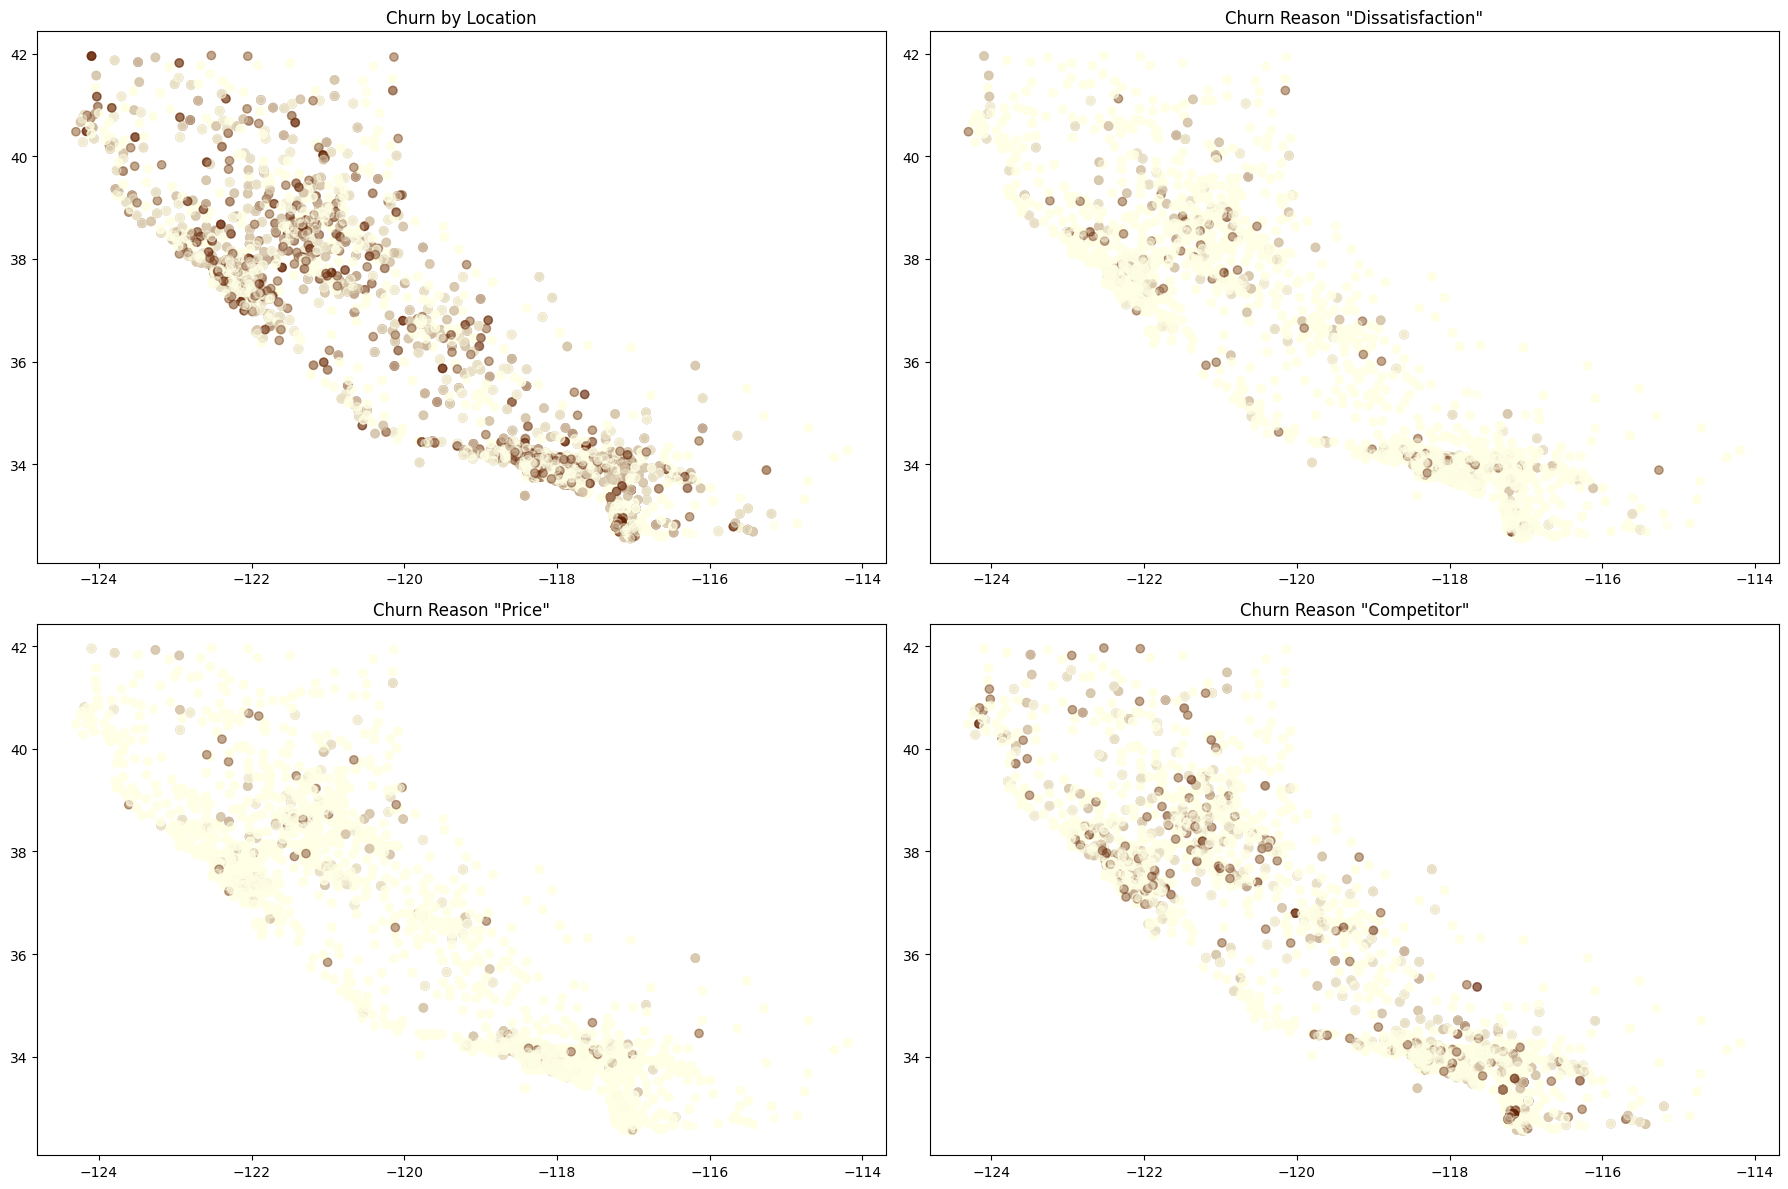

In [20]:


churn_by_location_df = pd.DataFrame({
    'churn_value': status_analysis_df['churn_value'],
    'latitude': location_data_df['latitude'],
    'longitude': location_data_df['longitude']
})

long = churn_by_location_df['longitude']
lat = churn_by_location_df['latitude']


plt.figure(figsize=(18, 12))
plt.subplot(2,2,1)
plt.scatter(long, lat, marker="o", c=churn_by_location_df['churn_value'],  alpha=0.4, cmap='YlOrBr')
plt.title('Churn by Location')

plt.subplot(2,2,2)
plt.scatter(long, lat, marker="o", c=binary_churn_cat['Dissatisfaction'],  alpha=0.4, cmap='YlOrBr')
plt.title('Churn Reason "Dissatisfaction"')

plt.subplot(2,2,3)
plt.scatter(long, lat, marker="o", c=binary_churn_cat['Price'],  alpha=0.4, cmap='YlOrBr')
plt.title('Churn Reason "Price"')

plt.subplot(2,2,4)
plt.scatter(long, lat, marker="o", c=binary_churn_cat['Competitor'],  alpha=0.4, cmap='YlOrBr')
plt.title('Churn Reason "Competitor"')

plt.tight_layout()
plt.show()

- Churn density appears in dense Telco using areas.
- There doesn't seem to be a link in dissatisfaction depending on location.

# Churn by GB Use and Tenure

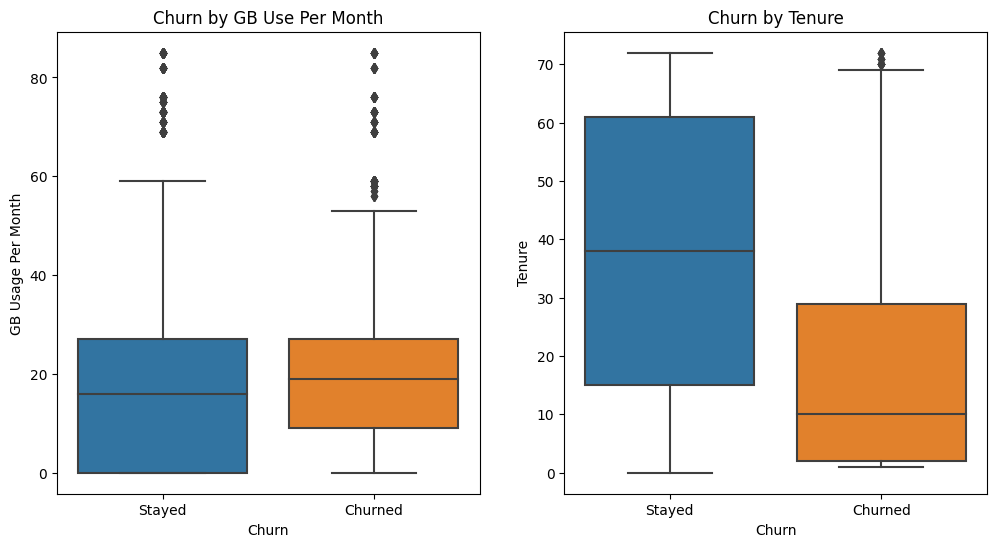

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sns.boxplot(x=status_analysis_df['churn_value'], y=service_options_df['avg_monthly_gb_download'])
plt.xlabel('Churn')
plt.ylabel('GB Usage Per Month')
plt.title('Churn by GB Use Per Month')
plt.xticks([0, 1], ['Stayed', 'Churned'])

plt.subplot(1,2,2)

sns.boxplot(x=status_analysis_df['churn_value'], y=service_options_df['tenure'])
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Churn by Tenure')
plt.xticks([0, 1], ['Stayed', 'Churned'])

plt.show()

- No discrepencies noticed in average gb used and churn.
- Churn by tenure does appear to matter, with most of those who churn are not long time customers.

# Churn by Offer Type

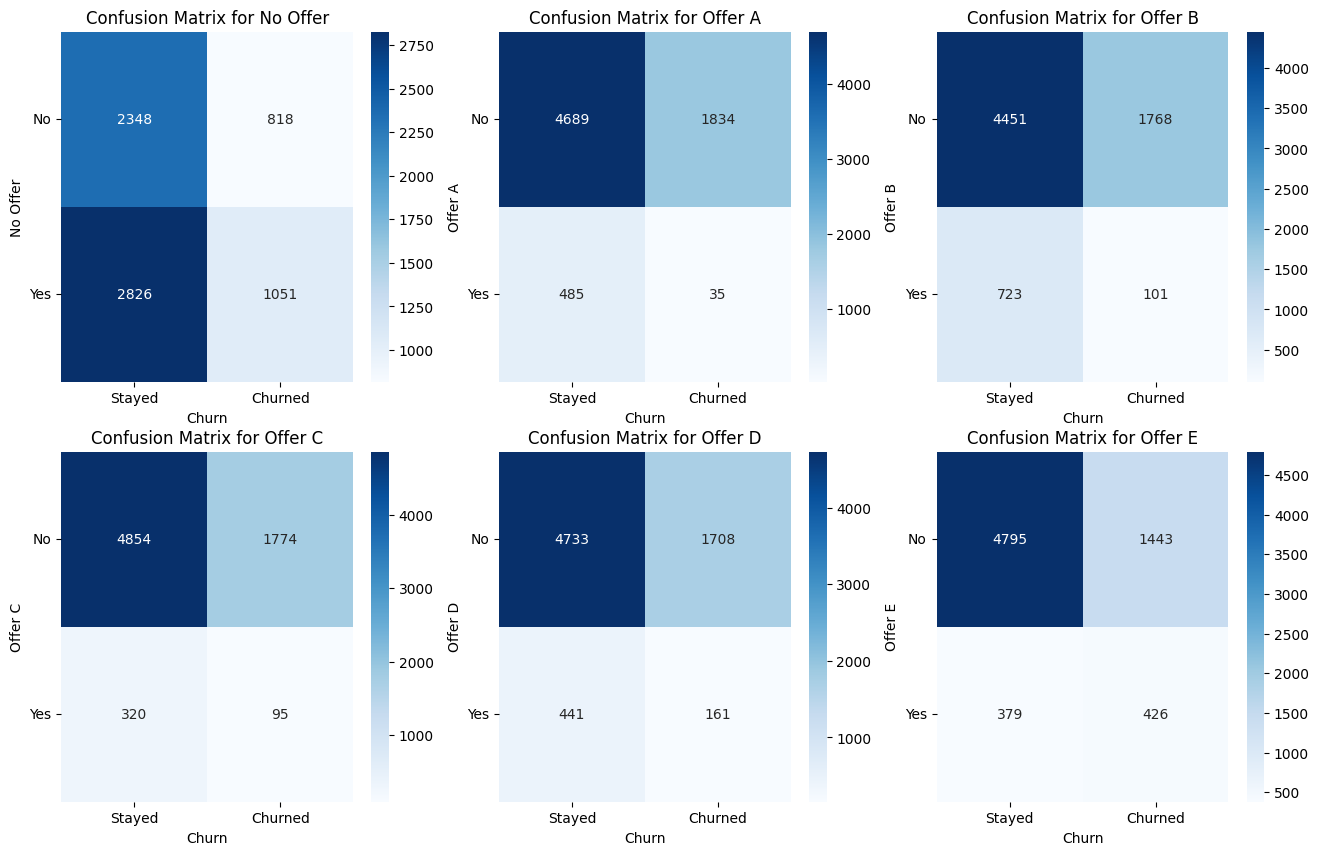

In [22]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,10))
for i in range(0,6) :
    
    plt.subplot(2,3,i+1)
    conf_matrix = confusion_matrix(offer_type_churn.iloc[:,i], offer_type_churn['churn_value'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    
    column_name = offer_type_churn.columns[i]  
    plt.ylabel(f'{column_name}')
    plt.xlabel('Churn')
    plt.title(f'Confusion Matrix for {column_name}')

    plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
    plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)

plt.show()


In [23]:
churn_no_offer = 1051 / (1051 + 2826)
churn_offer_a = 35 / (485 + 35)
churn_offer_b = 101 / (101 + 723)
churn_offer_c = 95 / (320 + 95)
churn_offer_d = 161 / (161 + 441)
churn_offer_e = 426 / (379 + 426)

print(f"Churn Percentage:\nNo Offer: {round(churn_no_offer, 2)}\nOffer A: {round(churn_offer_a,2)}")
print(f"Offer B: {round(churn_offer_b,2)}\nOffer C: {round(churn_offer_c,2)}\nOffer D: {round(churn_offer_d,2)}\nOffer E: {round(churn_offer_e,2)}")

Churn Percentage:
No Offer: 0.27
Offer A: 0.07
Offer B: 0.12
Offer C: 0.23
Offer D: 0.27
Offer E: 0.53


- 53% of customers that choose Offer E churned
- Offers A and B have a high retention rate

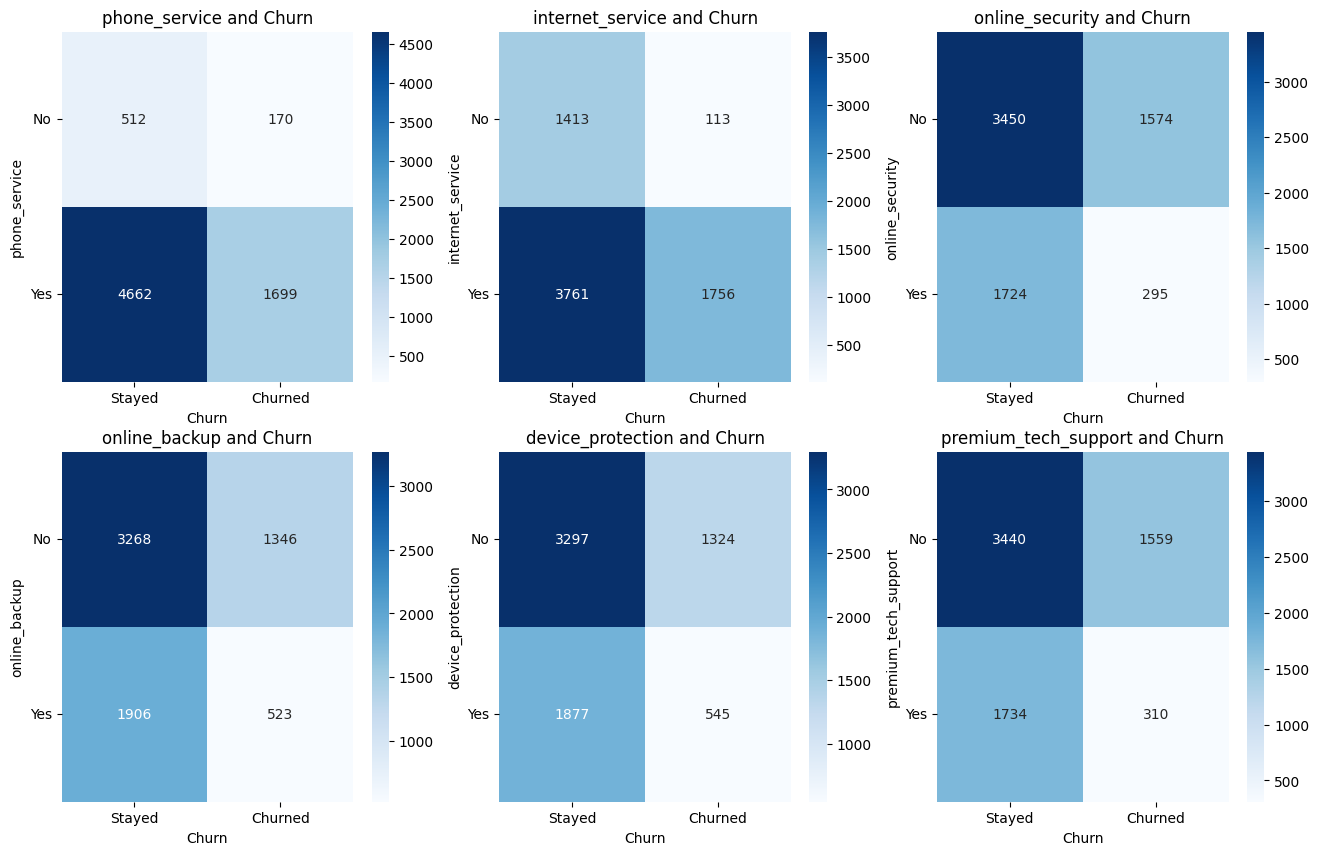

In [24]:
plt.figure(figsize=(16,10))
for i in range(0,6):
    
    plt.subplot(2,3,i+1)
    conf_matrix = confusion_matrix(online_services_churn.iloc[:,i], online_services_churn['churn_value'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

    column_name = online_services_churn.columns[i]  
    plt.ylabel(f'{column_name}')
    plt.xlabel('Churn')
    plt.title(f'{column_name} and Churn')

    plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
    plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
    
plt.show()

In [25]:
churn_phone = 1699 / (1699 + 4622)
churn_internet = 1756 / (3761 + 1756)
churn_security = 295 / (1724 + 295)
churn_backup = 523 / (1906 + 523)
churn_device_prot = 545 / (1877 + 545)
churn_premium_supp = 310 / (310+1734)

print(f"Churn with Phone Servce: {round(churn_phone,2)}\nChurn with Internet Service: {round(churn_internet,2)}")
print(f"Churn with Online Security: {round(churn_security,2)}\nChurn with Device Backup: {round(churn_backup,2)}")
print(f"Churn with Device Protection: {round(churn_device_prot,2)}\nChurn with Premium Tech Support: {round(churn_premium_supp,2)}")

Churn with Phone Servce: 0.27
Churn with Internet Service: 0.32
Churn with Online Security: 0.15
Churn with Device Backup: 0.22
Churn with Device Protection: 0.23
Churn with Premium Tech Support: 0.15


- Premium Tech Support and Online Security appear to reduce churn.
- Highest rates of churn appear in Phone and Internet Service

# Churn by Internet Type

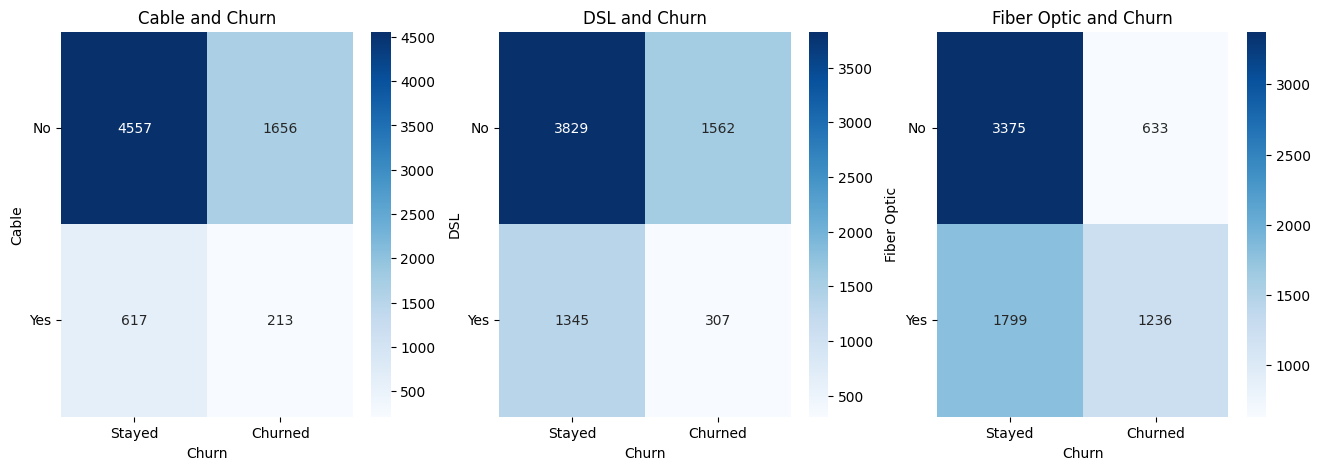

In [26]:
plt.figure(figsize=(16,5))
for i in range(0,3):
    
    plt.subplot(1,3,i+1)
    conf_matrix = confusion_matrix(internet_type.iloc[:,i], internet_type['churn_value'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

    column_name = internet_type.columns[i]  
    plt.ylabel(f'{column_name}')
    plt.xlabel('Churn')
    plt.title(f'{column_name} and Churn')
    plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
    plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
    
plt.show()

In [27]:
cable_churn = round((213 / (213 + 1656)), 2)
dsl_churn = round((307 / (307 + 1562)), 2)
fiber_churn = round((1236 / (1236 + 633)), 2)

print(f"Churn by Cable: {cable_churn}\nChurn by DSL: {dsl_churn}\nChurn by Fiber Optic: {fiber_churn}")

Churn by Cable: 0.11
Churn by DSL: 0.16
Churn by Fiber Optic: 0.66


- Churn by customers using Fiber Optic internet was 66%
- Churn by customers using DSL or Cable was low

# Churn by Customer Data

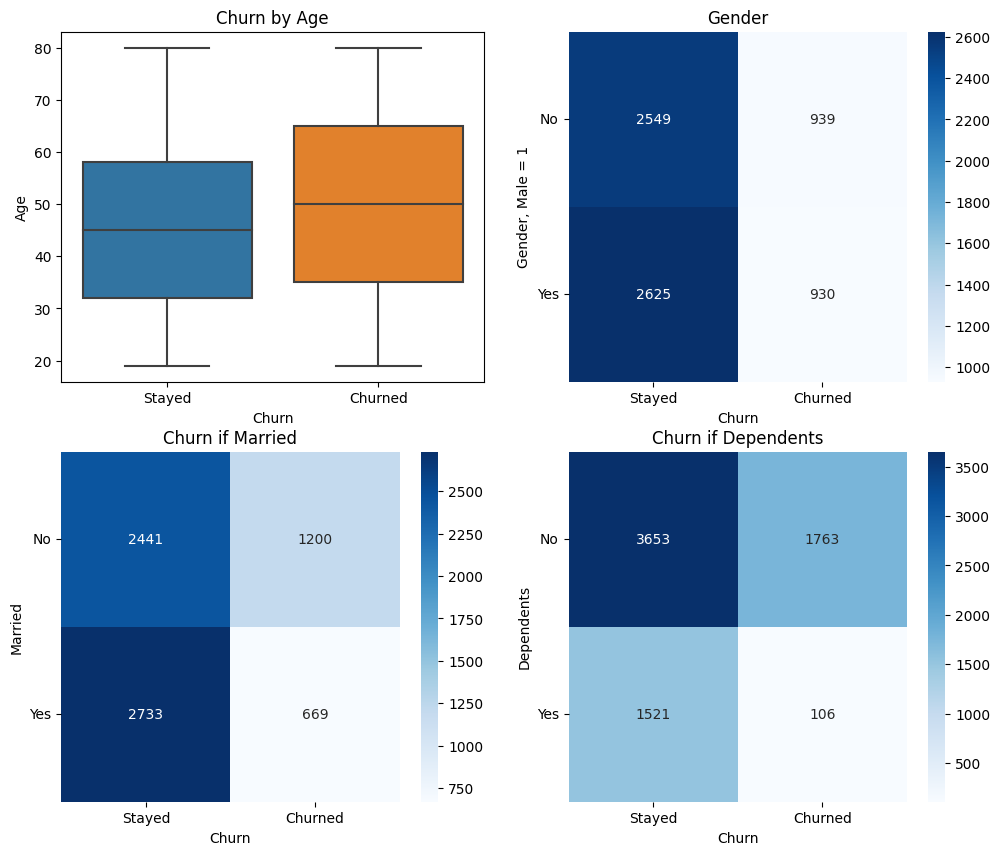

In [28]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(x=customer_info_df_binary['churn_value'], y=customer_info_df_binary['age'])
plt.title('Churn by Age')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.xticks([0, 1], ['Stayed', 'Churned'])

plt.subplot(2,2,2)
conf_matrix = confusion_matrix(customer_info_df_binary['gender'], customer_info_df_binary['churn_value'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Gender')
plt.xlabel('Churn')
plt.ylabel('Gender, Male = 1')
plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)


plt.subplot(2,2,3)
conf_matrix = confusion_matrix(customer_info_df_binary['married'], customer_info_df_binary['churn_value'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Churn if Married')
plt.xlabel('Churn')
plt.ylabel('Married')
plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)

plt.subplot(2,2,4)
conf_matrix = confusion_matrix(customer_info_df_binary['dependents'], customer_info_df_binary['churn_value'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Churn if Dependents')
plt.xlabel('Churn')
plt.ylabel('Dependents')
plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)

plt.show()

- Gender doesn't appear to be a factor in churn.
- Customers that are married or have dependents are less likely to churn.

# Churn by Payment Information

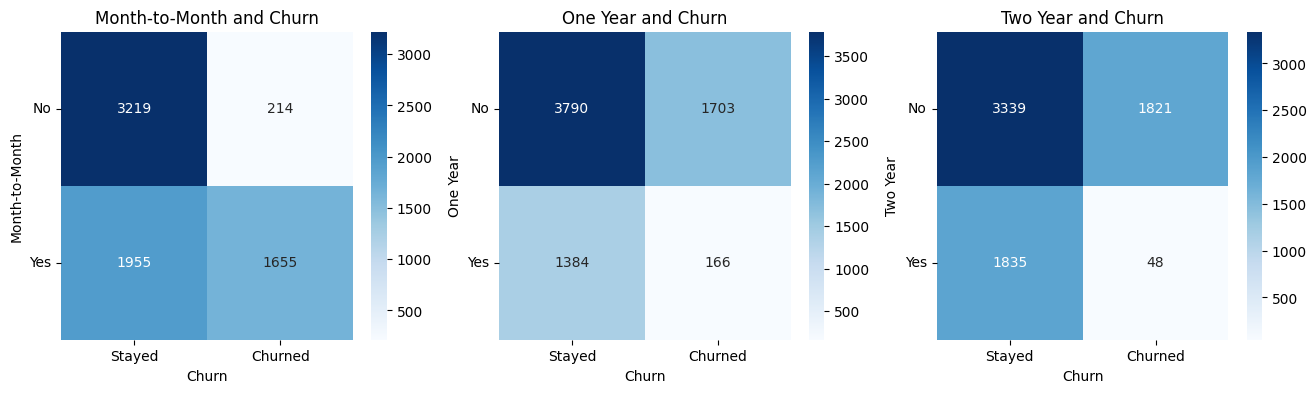

In [29]:
plt.figure(figsize=(16,4))
for i in range(len(contract_binary.columns)) :
    plt.subplot(1,3,i+1)
    conf_matrix = confusion_matrix(contract_binary.iloc[:,i], status_analysis_df['churn_value'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    
    col_name = contract_binary.columns[i]
    plt.title(f'{col_name} and Churn')
    plt.xlabel('Churn')
    plt.ylabel(f'{col_name}')
    plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])
    plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)

plt.show()

- Churn less likely in long-term cotracts

In [30]:
payment_info.corr()

,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_value
monthly_ charges,1.000000,0.138396,0.651236,0.033482,0.126244,0.246300,0.588887,0.193356
avg_monthly_long_distance_charges,0.138396,1.000000,0.069500,-0.018644,0.002414,0.599828,0.232291,0.008120
total_charges,0.651236,0.069500,1.000000,0.039558,0.121859,0.610185,0.972212,-0.198546
total_refunds,0.033482,-0.018644,0.039558,1.000000,0.016755,0.028113,0.036984,-0.033709
total_extra_data_charges,0.126244,0.002414,0.121859,0.016755,1.000000,0.058871,0.122496,0.007139
total_long_distance_charges,0.246300,0.599828,0.610185,0.028113,0.058871,1.000000,0.778559,-0.223756
total_revenue,0.588887,0.232291,0.972212,0.036984,0.122496,0.778559,1.000000,-0.223003
churn_value,0.193356,0.008120,-0.198546,-0.033709,0.007139,-0.223756,-0.223003,1.000000


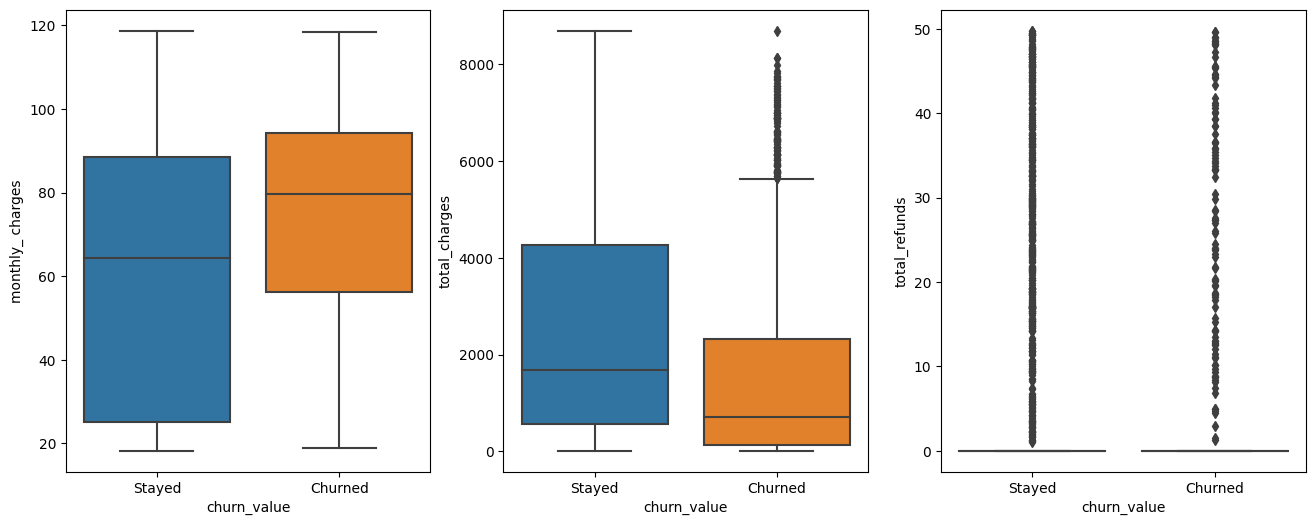

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.boxplot(x=payment_info['churn_value'],y=payment_info['monthly_ charges'])
plt.xticks([0, 1], ['Stayed', 'Churned'])


plt.subplot(1,3,2)
sns.boxplot(x=payment_info['churn_value'],y=payment_info['total_charges'])
plt.xticks([0, 1], ['Stayed', 'Churned'])

plt.subplot(1,3,3)
sns.boxplot(x=payment_info['churn_value'],y=payment_info['total_refunds'])
plt.xticks([0, 1], ['Stayed', 'Churned'])

plt.show()

- Monthly charges are good indicator of churn, lower monthly charges keeps customers
- Monthly charges are only value that will be included in ML model

# Model Training

In [32]:
X = pd.concat([service_options_df['unlimited_data'],service_options_df['tenure'], binary_offer_type, 
               online_services_final, internet_type, customer_info_final, status_analysis_df['satisfaction_score'],
               contract_binary,payment_info['monthly_ charges']], axis=1)
y = status_analysis_df['churn_value']

In [33]:
X = X.drop(columns='churn_value')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

pipeline = Pipeline([
   ('Scaler', StandardScaler()),
   ('clf', LogisticRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('clf', LogisticRegression())])

In [35]:
score = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {score:.2f}")

Test Accuracy: 0.96


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.94819021 0.96167495 0.95173882 0.95880682 0.95454545]
Average score: 0.9549912494354474


# Conclusion

- <p style="font-size: 18px">Churn by tenure does appear to matter, with most of those who churn are not long time customers.</p>
   
- <p style="font-size: 18px">53% of customers that chose Offer E churned.</p>

  - <p style="color: dark gray">Alter Offer E, or get rid of it completely. </p>
    
      
- <p style="font-size: 18px">Offers A and B have a high retention rate.</p>

  - <p style="color: dark gray"> Market Offers A and B more to draw more long time customers. </p>
     
    
      
- <p style="font-size: 18px">Premium Tech Support and Online Security appear to reduce churn.</p>

- <p style="font-size: 18px">Highest rates of churn appear in Phone and Internet Service.</p>

  - <p style="color: dark gray"> Could be due to them being the most used service, or they need to be upgraded. </p>
        

      
- <p style="font-size: 18px">Customers that are married or have dependents are less likely to churn.</p>

  - <p style="color: dark gray"> Find a way to appeal more to those who are married and/or have children. </p>
    
    
      
- <p style="font-size: 18px">Monthly charges are good indicator of churn; lower monthly charges keeps customers.</p>
